1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

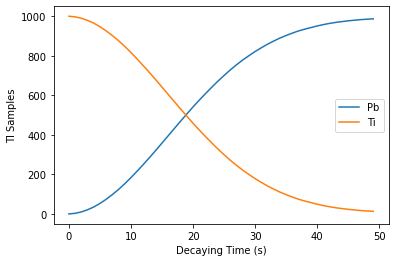

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Tl = [1000]
Pb = [0]


def p(t,tau = 183.12):
    return 1 - 2**(-t/tau)
def p2(t,tau = 183.12):
    return (2**(-1*t/tau))*np.log(2)/tau

def icdf2(y,tau = 183.12):
    return  -tau*np.log2(1 - y)
end = 50
for i in range(1,end):
    per = p(i)
    x = int(Tl[-1]*per)
    Pb.append(Pb[-1] + x)
    Tl.append(Tl[-1] - x)

x = np.arange(0,end)

plt.plot(x,Pb,label = 'Pb')
plt.plot(x,Tl,label = 'Ti')
plt.xlabel('Decaying Time (s)')
plt.ylabel('Tl Samples')
plt.legend()
plt.show()

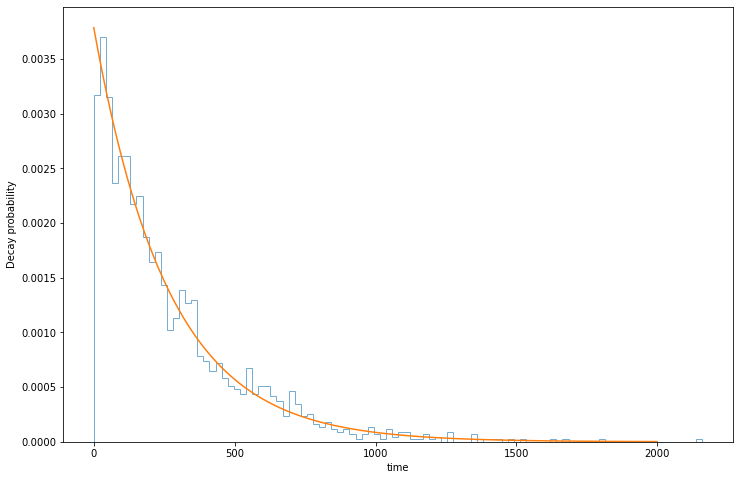

In [8]:
#inverse transform method
decay_time = 3.052* 60 #converting to seconds
def p(x):
    return pow(2,(-x/decay_time))*np.log(2)/decay_time

y = p(x)
x = np.arange(2000)
def inv(x):
    return -np.log(1-x)*decay_time/(np.log(2))

x1 = np.random.random(2000)
x2 = inv(x1)

fig,ax = plt.subplots(figsize = (12,8))
ax.hist(x2,bins = 100, histtype = 'step', density = True, alpha = 0.6)
ax.plot(x,y)
ax.set_xlabel("time")
ax.set_ylabel("Decay probability")
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

No handles with labels found to put in legend.


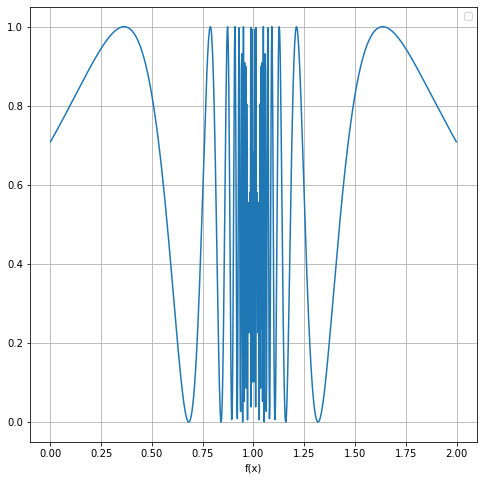

In [10]:
#definition of the function given
def f(x):
    return np.sin(1 / (1-x))**2 

x = np.linspace(0.001, 1.999, 1000)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, f(x) )
ax.set_xlabel('f(x)')
ax.legend()
ax.grid()
plt.show()

In [11]:
def hit_miss(f):
    N = 100000
    count = 0
    for i in range(N):
        x = 2 * np.random.random()
        y = np.random.random()
        if y < f(x):
            count += 1
    I = 2 * count / N
    return I
 
def error_estimation():
    integrals = []
    for i in range(100):
        integrals.append(hit_miss(f))
    return np.array(integrals)
integrals = error_estimation()

print('Mean = ', integrals.mean())
print('Error = ', integrals.std())

Mean =  1.3464434
Error =  0.0031024558723694966


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [12]:
#computing area of circle conditional function
def f(x,V):
    if sum([ x[i]**2 for i in range(V)])<=1:
       return 1
    else:
        return 0

def comV(V):
    #range
    a=-1
    b=1
    #
    N=100000

    sum_f=0
    for i in range(N):
        x_random = np.array([np.random.uniform(a, b) for i in range(V)])
        sum_f+=f(x_random,V)
    return ((2**V)*sum_f)/N


print("Area of circle (dim=2) = ",comV(V=2))
print("Area of circle (dim=10) = ",comV(V=10))

#generalizing the result for a 10D sphere

Area of circle (dim=2) =  3.1482
Area of circle (dim=10) =  2.42688


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

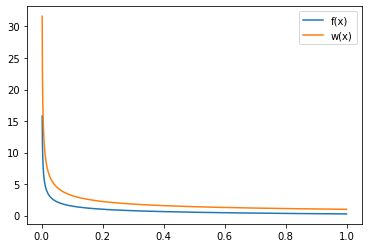

The integral results:  0.8405146189238073


In [24]:
import scipy.integrate as integrate
N = 10000

def fun(x): #function to be integrated
    return np.power(x,-0.5)/(np.exp(x)+1)
    
def w(x): #weight function
    return 1/np.sqrt(x)

x = np.linspace(0.001,1,N)
y = [fun(i) for i in x]

#plot
plt.plot(x,y)
plt.plot(x,w(x))
plt.legend(["f(x)","w(x)"])
plt.show()

N = 10000

I = np.zeros(N)
I2 =np.zeros(N)
for i in range(10000):
    x = (np.random.random())**2
    I[i] = fun(x)
    I2[i] = w(x)
int_val = (1/N)*np.sum(I/I2)*2

# h_is = (weight_int / n) * np.sum(y/w(x))
print("The integral results: ",int_val)